## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [1]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3):
    F=[]
    F.append(F0)#füge F0 hinzu
    F.append(F1)#füge F1 hinzu
    for i in range(2,N): 
        F.append(None)#fügt leeres F[i] hinzu, damit F[i] in der nächsten Zeile benutzt werden kann
        F[i]=a*F[i-1]+b*F[i-2]#definiert F[i] nach der Funktion in der Aufgabenstellung
    return(F)#gibt die Liste mit den Fibonaccizahlen zurück
        
    

In [2]:
print(AllgFib(N=3))

[1, 1, 2]


In [3]:
from pylab import *

def my_sqrt_nichtkontrollieren_zuvielrechenleistung_abergenauer(x):
    F=AllgFib(a=2,b=x-1,N=100)#erstellt eine Liste der Allgemeinen Fibbonacci Zahlen mit dem Parameter 2 und der Länge N
    l=len(F)#Schreibt die Länge der Liste F in eine Variable l
    
    a=F[len(F)-1]/F[len(F)-1-1]#berechnet wie in der Vorlesung gezeigt eine Annäherung an den Grenzwert (mit Iterationsschritt N=100), der Grenzwert ist (1+die Wurzel aus x)
    return(a-1)#zieht die 1 ab und gibt eine Annäherung an die Wurzel von x zurück

print("Ergebnis my_sqrt_nichtkontrollieren_abergenauer:", my_sqrt_nichtkontrollieren_zuvielrechenleistung_abergenauer(2))  #Ergebnis der obrigen Funktion
print("Ergebnis np.sqrt" ,np.sqrt(2))   #Ergebnis der vorinstallierten Funktion 

Ergebnis my_sqrt_nichtkontrollieren_abergenauer: 1.414213562373095
Ergebnis np.sqrt 1.41421356237


In [4]:
from pylab import *

def betrag(x):#definiert eine Betragsfunktion, die für die sqrt Funktion benötigt wird
    if x<0:
        x=-x
    return x

def my_sqrt(x):
    
    genauigkeit = False #ändert sich im laufe der nächsten while schleife zu False, wenn die Genauigkeit von 2 aufeinadnerfolgenden Zahlen erreicht ist 
    Fa=1;#setzt die beiden anfangswerte auf 1
    Fb=1
    #i=1
    maschinengenauigkeit=2**(-24)#definierte Maschinengenauigkeit bei IEEE754
    
    while genauigkeit!=True:#die Variable genauigkeit ist solange False, bis die genügende Genauigkeit erreicht ist, dann endet die while Schleife
        F=AllgFib(F0=Fa,F1=Fb,a=2,b=x-1) #F ist eine Liste, welche 3 aufeinanderfolgende Fibonaccizahlen enthält
        
        #i=i+1
        #print(F[2]/F[2-1]-F[2-1]/F[2-2])
         
        if (betrag(F[2]/F[2-1]-F[2-1]/F[2-2]))<maschinengenauigkeit:#wenn die Genauigkeit erreicht wird;
            genauigkeit=True#wird der genauigkeitswert auf True gesetzt und die while Schleife beendet sich
            
        else:#while Schleife läuft weiter, wenn die Maschinengenauigkeit noch nicht erreicht ist
            Fa=F[1];Fb=F[2]#die Stelle F[2] in der nächsten Liste F (größe 3) besitzt durch diese Anweisung die nächst höhere Fibonaccizahl im Vergleich zu F[2]in dieser Liste F
            
            
    naehrung_grenzwert=F[2]/F[2-1]#berechnet den Grenzwert der Folge Fn/Fn-1, welcher in diesem Fall nährungsweise 1+sqrt(x) ist
    return(naehrung_grenzwert-1)#gibt diesen Grenzwert -1 ab, dies ist nährungsweise die Gesuchte Wurzel der Zahl x

print ("Ergebnis my_sqrt:", my_sqrt(2))
print ("Ergebnis np.sqrt:", sqrt(2))

Ergebnis my_sqrt: 1.4142135605326258
Ergebnis np.sqrt: 1.41421356237


### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [5]:
from pylab import *

def tau(n):
    i=0 #setzt die Iterationsvariabel auf 0
    if n==0 or n<0 or n%1!=0: #Wenn die eingegebene Zahl 0,negativ oder Kommastellen besitzt, ist diese Zahl keine Natürliche Zahl 
        print("Error, die eingegebene Zahl ist keine Natürliche Zahl, geben Sie bitte eine Natürliche Zahl ein ")#da die Funktion für diesen Fall nicht definiert ist, wird eine Fehlermeldung ausgegeben
        return (None)
    
    else:#die Zahl ist eine Natürliche Zahl. Deshalb wird nun normal vorgegangen
        while n!=1 and i!=2000: #while Schleife läuft bis n==1, außerdem wird die while Schleife gestoptt, falls 2000 Iterationsschritte gemacht worden sind um einer Endlosschleife vorzubeugen
        
            if n%2==0:  #wenn n gerade ist;
                n=n/2   #wird die Zahl durch 2 geteilt
            else:       #wenn die Zahl ungerade ist;
                n=3*n+1 #wird die Zahl mit 3 multipliziert und mit 1 addiert
            
            i=i+1# erhöht die Iterationsvariabel nach jedem Durchgang um 1
            #print("Iterationsschritt:", i, "Wert:",n)#zur Ausgabe vom jeweilligen Iterationsschritt
        
        return(i)#gibt die Iterationsvariabel zurück

In [9]:
tau(31)

106

<IPython.core.display.Javascript object>


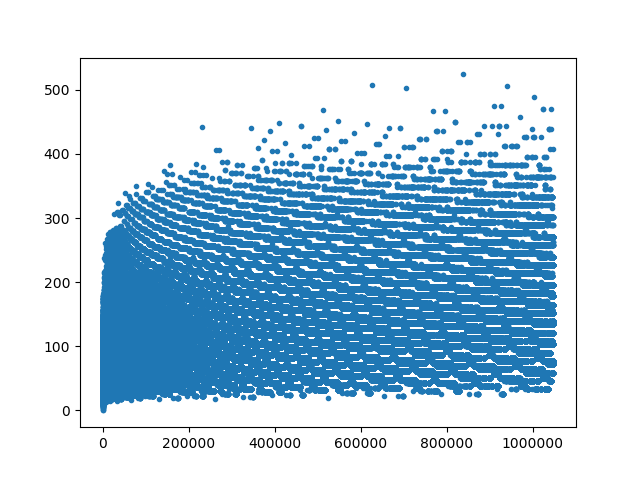

In [7]:
l=[tau(t) for t in range(1,2**20)]#schreibt die Werte der Funktion tau(t) für die Zahlen t von 1 bis 2**20
%matplotlib notebook
plot(l,'.')#plottet die Liste l 
show()